In [3]:
 %matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import mahotas as mh
from pylab import imshow, gray, show
from PIL import Image
import PIL.ImageOps
import imutils
import scipy.misc
import math
from skimage.measure import compare_ssim as ssim
from keras.models import load_model
from keras.preprocessing import image
import os 
import chess

Using TensorFlow backend.
/Users/yashaektefaie/anaconda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


In [4]:
#Load the color model
color = load_model('color_model.h5')

In [219]:
total_squares = [chess.A8,chess.B8,chess.C8,chess.D8,chess.E8,chess.F8,chess.G8,chess.H8,chess.A7,chess.B7,chess.C7,chess.D7,chess.E7,chess.F7,chess.G7,chess.H7,chess.A6,chess.B6,chess.C6,chess.D6,
                 chess.E6,chess.F6,chess.G6,chess.H6,chess.A5,chess.B5,chess.C5,chess.D5,chess.E5,chess.F5,chess.G5,
                 chess.H5,chess.A4,chess.B4,chess.C4,chess.D4,chess.E4,chess.F4,chess.G4,chess.H4,
                 chess.A3,chess.B3,chess.C3,chess.D3,chess.E3,chess.F3,chess.G3,chess.H3,chess.A2,chess.B2,chess.C2,chess.D2,chess.E2,
                 chess.F2,chess.G2,chess.H2,chess.A1,chess.B1,chess.C1,chess.D1,chess.E1,chess.F1,chess.G1,chess.H1]

king_boundaries = [
    ([50, 170, 80],  [60, 180, 90]),
    ([80, 150, 80],  [90, 160, 95]),
    ([40, 150, 85],  [60, 160, 95]),
    ([110, 180, 120],  [120, 190, 130]),
    ([110, 150, 120],  [120, 160, 130]),
    ([90, 130, 90],  [100, 140, 100]),
    ([150, 210, 140],  [160, 220, 150]),
    ([90, 135, 90],  [110, 150, 110]),
    ([129, 165, 120],  [160, 175, 130])
]

bishop_boundaries = [
    ([110, 70, 30],  [125, 80, 40]),
    ([120, 80, 50],  [130, 90, 60]),
    ([180, 110, 20],  [200, 140, 60]),
    ([140, 90, 20],  [150, 140, 60])
]

queen_boundaries = [
    ([150, 10, 20],  [190, 40, 60]),
    ([210, 30, 30],  [230, 50, 50]),
    ([170, 60, 60],  [190, 80, 80]),
    ([210, 90, 100],  [220, 100, 110]),
    ([80, 20, 20],  [90, 30, 30]),
    ([120, 35, 45],  [140, 50, 55])
]

rook_boundaries = [
    ([50, 90, 140],  [90, 130, 180]),
    ([30, 60, 90],  [50, 80, 110]),
    ([80, 140, 200],  [100, 1500, 210]),
    ([25, 36, 54],  [30, 41, 60])
]

black_boundaries = [
    ([0, 0, 0],  [50, 50, 50])
]

knight_boundaries = [
    ([240, 230, 60],  [255, 240, 80]),
    ([180, 160, 45],  [190, 170, 60]),
    ([120, 120, 20],  [150, 150, 50]),
    ([240, 240, 100],  [255, 250, 120]),
    ([210, 200, 120],  [220, 210, 130]),
    ([220, 180, 60],  [240, 210, 90]),
    ([160, 160, 50],  [180, 170, 65])
]

pawn_boundaries = [
    ([120, 100, 60],  [150, 130, 100]),
    ([170, 140, 120],  [190, 160, 130]),
    ([140, 140, 125],  [160, 150, 135])
#     ([170, 170, 145],  [190, 180, 165])
]



possible_pieces = [[king_boundaries, 'king'], [queen_boundaries, 'queen'], [bishop_boundaries, 'bishop'], [rook_boundaries, 'rook'], [knight_boundaries, 'knight'],
                  [pawn_boundaries, 'pawn']]
possible_color = [[black_boundaries, 'black']]
final_piece_mapping = {}

In [220]:
from skimage.measure import compare_ssim
from skimage.transform import resize
from scipy.misc import imsave
from scipy.ndimage import imread

def find_closest_letter(input_image3):
    
    imagee = cv2.imread(input_image3)
    imagee = cv2.cvtColor(imagee, cv2.COLOR_RGB2BGR)
    imshow(imagee)
    show()
    
    piece = None
    current_largest = 0
    colour = 'white'
    
    for boundry, name in possible_pieces:
        for (lower, upper) in boundry:
            imagee = cv2.imread(input_image3)
            imagee = cv2.cvtColor(imagee, cv2.COLOR_RGB2BGR)
            imagee = cv2.resize(imagee, (200,200))
            # create NumPy arrays from the boundaries
            lower = np.array(lower, dtype = "uint8")
            upper = np.array(upper, dtype = "uint8")

            # find the colors within the specified boundaries and apply
            # the mask
            mask = cv2.inRange(imagee, lower, upper)
            output = cv2.bitwise_and(imagee, imagee, mask = mask)
            ret,thresh1 = cv2.threshold(output,1,1,cv2.THRESH_BINARY)
#             print((lower, upper))
#             imshow(output)
#             show()
            summation = thresh1.sum().sum()
            if(summation > 40 and summation > current_largest):
                print(lower)
                print(upper)
                piece = name
                current_largest = summation
                imshow(output)
                show()
    for boundry, name in possible_color:
        for (lower, upper) in boundry:
            imagee = cv2.imread(input_image3)
            imagee = cv2.cvtColor(imagee, cv2.COLOR_RGB2BGR)
            lower = np.array(lower, dtype = "uint8")
            upper = np.array(upper, dtype = "uint8")

            # find the colors within the specified boundaries and apply
            # the mask
            mask = cv2.inRange(imagee, lower, upper)
            output = cv2.bitwise_and(imagee, imagee, mask = mask)
            ret,thresh1 = cv2.threshold(output,1,1,cv2.THRESH_BINARY)
            summation = thresh1.sum().sum()
            if(summation > 400):
                colour = 'black'
                imshow(output)
                show()
                
    
    test_image = image.load_img(input_image3, target_size=(84,84))
    test_image = image.img_to_array(test_image)*(1./255)
    test_image = np.expand_dims(test_image, axis = 0)
    color_prediction = color.predict(test_image, batch_size = 32)
    print(color_prediction)
    if(np.argmax(color_prediction) == 1 and not piece):
        return "BLANK"
    else:
        if(not piece):
            return "BLANK"
        else:
            if(colour == 'black'):
                return ['black', piece]
            else:
                return ['white', piece]
            

In [233]:
def breakdown_image(image):
    im = Image.open(image)
    im = im.resize((700,700))

    def crop(im):
        imgwidth, imgheight = im.size
        imgwidth, imgheight = int(imgwidth), int(imgheight)
        height, width = imgheight/8, imgwidth/8
        count = 0
        print(np.linspace(0,imgheight,9))
        print("IMGWIDTH: {}\t IMGHEIGHT: {}\t WIDTH: {}\tHEIGHT: {}".format(imgwidth, imgheight, width, height))
        for i in np.linspace(0,imgheight,9):
            if(i == 700):
                break
            for j in np.linspace(0,imgwidth,9):
                if(j == 700):
                    break
                print("{}\t{}\t{}\t{}".format(j, i, j+width, i+height))
                box = (j, i, j+width, i+height)
                pass_in = np.array(im.crop(box))
                cv2.imwrite('intermediate.png', cv2.cvtColor(pass_in, cv2.COLOR_RGB2BGR))
                result = find_closest_letter('intermediate.png')
                if(result == 'BLANK'):
                    print("LOCATION: {} PIECE: {}".format(total_squares[count],'Blank'))
                elif(result[0] == 'black'):
                    print("LOCATION: {} PIECE: {}".format(total_squares[count], 'black '+result[1]))
                    piece = result[1]
                    if(piece == 'pawn'):
                        final_piece_mapping[total_squares[count]] = chess.Piece(chess.PAWN,chess.BLACK)
                    elif(piece == 'bishop'):
                        final_piece_mapping[total_squares[count]] = chess.Piece(chess.BISHOP,chess.BLACK)
                    elif(piece == 'queen'):
                        final_piece_mapping[total_squares[count]] = chess.Piece(chess.QUEEN,chess.BLACK)
                    elif(piece == 'king'):
                        final_piece_mapping[total_squares[count]] = chess.Piece(chess.KING,chess.BLACK)
                    elif(piece == 'knight'):
                        final_piece_mapping[total_squares[count]] = chess.Piece(chess.KNIGHT,chess.BLACK)
                    elif(piece == 'rook'):
                        final_piece_mapping[total_squares[count]] = chess.Piece(chess.ROOK,chess.BLACK)
                elif(result[0] == 'white'):
                    print("LOCATION: {} PIECE: {}".format(total_squares[count], 'white '+result[1]))
                    piece = result[1]
                    if(piece == 'pawn'):
                        final_piece_mapping[total_squares[count]] = chess.Piece(chess.PAWN,chess.WHITE)
                    elif(piece == 'bishop'):
                        final_piece_mapping[total_squares[count]] = chess.Piece(chess.BISHOP,chess.WHITE)
                    elif(piece == 'queen'):
                        final_piece_mapping[total_squares[count]] = chess.Piece(chess.QUEEN,chess.WHITE)
                    elif(piece == 'king'):
                        final_piece_mapping[total_squares[count]] = chess.Piece(chess.KING,chess.WHITE)
                    elif(piece == 'knight'):
                        final_piece_mapping[total_squares[count]] = chess.Piece(chess.KNIGHT,chess.WHITE)
                    elif(piece == 'rook'):
                        final_piece_mapping[total_squares[count]] = chess.Piece(chess.ROOK,chess.WHITE)
                count += 1
    crop(im)

[  0.   87.5 175.  262.5 350.  437.5 525.  612.5 700. ]
IMGWIDTH: 700	 IMGHEIGHT: 700	 WIDTH: 87.5	HEIGHT: 87.5
0.0	0.0	87.5	87.5


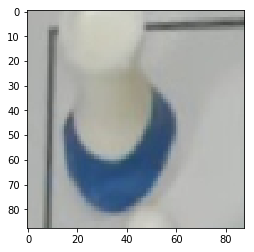

[ 50  90 140]
[ 90 130 180]


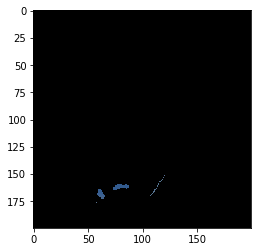

[30 60 90]
[ 50  80 110]


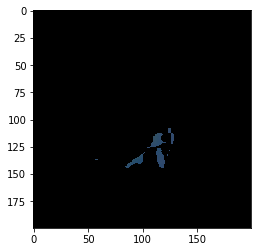

[[0.35053375 0.34489572 0.30457053]]
LOCATION: 56 PIECE: white rook
87.5	0.0	175.0	87.5


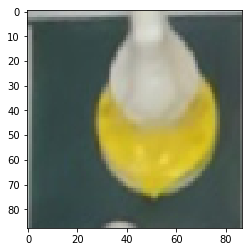

[140  90  20]
[150 140  60]


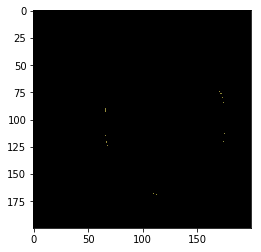

[180 160  45]
[190 170  60]


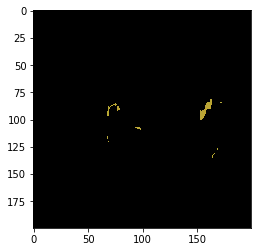

[220 180  60]
[240 210  90]


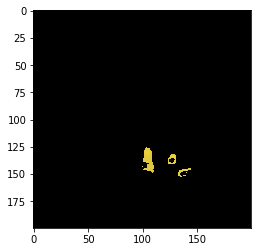

[[0.02817857 0.02118521 0.9506362 ]]
LOCATION: 57 PIECE: white knight
175.0	0.0	262.5	87.5


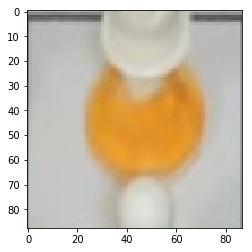

[180 110  20]
[200 140  60]


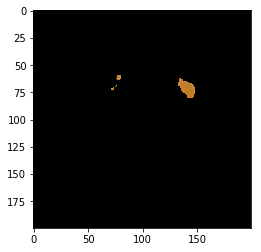

[[0.01765738 0.01668636 0.9656563 ]]
LOCATION: 58 PIECE: white bishop
262.5	0.0	350.0	87.5


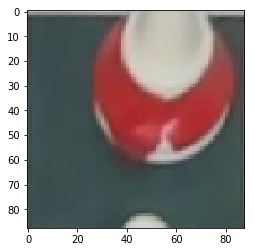

[150  10  20]
[190  40  60]


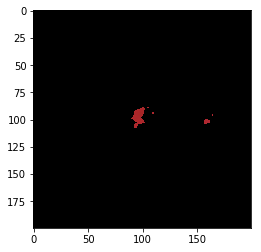

[170  60  60]
[190  80  80]


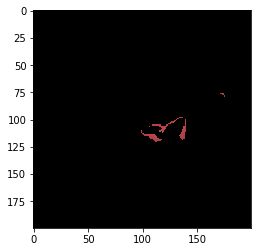

[[0.52335644 0.05003145 0.42661208]]
LOCATION: 59 PIECE: white queen
350.0	0.0	437.5	87.5


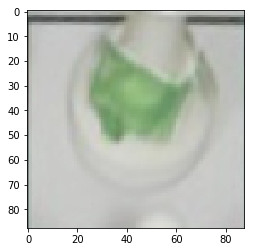

[ 90 135  90]
[110 150 110]


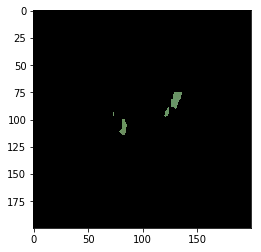

[129 165 120]
[160 175 130]


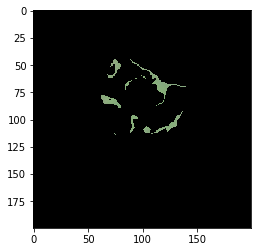

[[0.0319472  0.09606524 0.8719876 ]]
LOCATION: 60 PIECE: white king
437.5	0.0	525.0	87.5


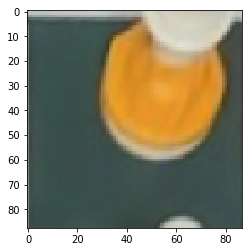

[180 110  20]
[200 140  60]


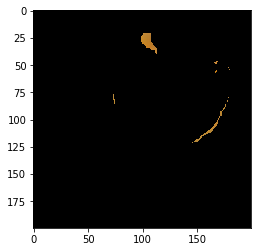

[[0.03154087 0.02504476 0.94341445]]
LOCATION: 61 PIECE: white bishop
525.0	0.0	612.5	87.5


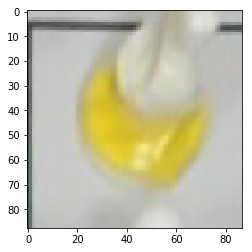

[180 160  45]
[190 170  60]


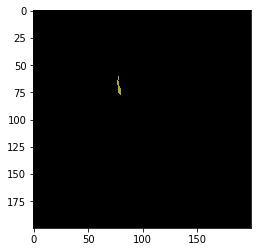

[220 180  60]
[240 210  90]


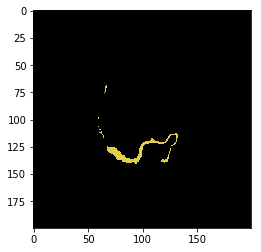

[[0.02625484 0.01994168 0.9538035 ]]
LOCATION: 62 PIECE: white knight
612.5	0.0	700.0	87.5


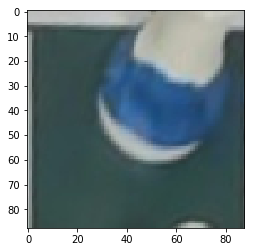

[ 50  90 140]
[ 90 130 180]


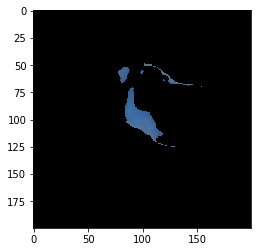

[[0.7640342  0.21318516 0.02278067]]
LOCATION: 63 PIECE: white rook
0.0	87.5	87.5	175.0


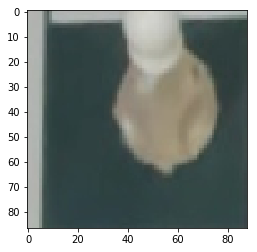

[120 100  60]
[150 130 100]


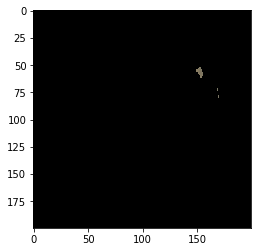

[140 140 125]
[160 150 135]


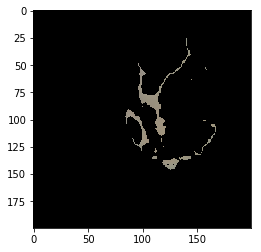

[[0.11394559 0.23396376 0.65209067]]
LOCATION: 48 PIECE: white pawn
87.5	87.5	175.0	175.0


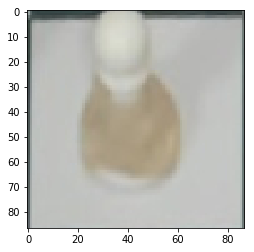

[170 140 120]
[190 160 130]


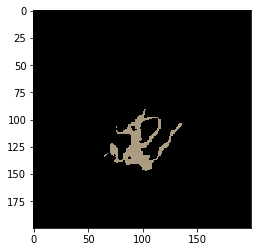

[[0.03455615 0.08059784 0.884846  ]]
LOCATION: 49 PIECE: white pawn
175.0	87.5	262.5	175.0


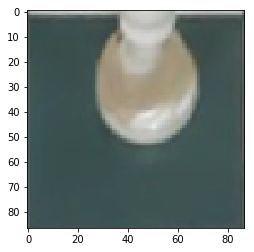

[120 100  60]
[150 130 100]


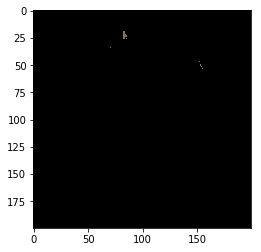

[140 140 125]
[160 150 135]


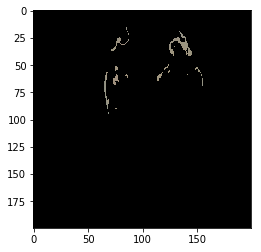

[[0.04057503 0.04611846 0.91330653]]
LOCATION: 50 PIECE: white pawn
262.5	87.5	350.0	175.0


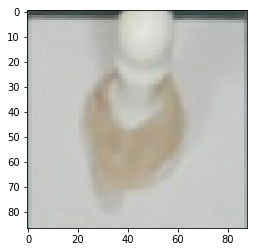

[170 140 120]
[190 160 130]


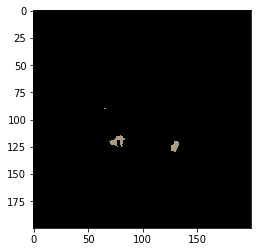

[[0.03235715 0.08220825 0.88543457]]
LOCATION: 51 PIECE: white pawn
350.0	87.5	437.5	175.0


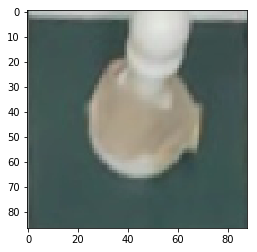

[140 140 125]
[160 150 135]


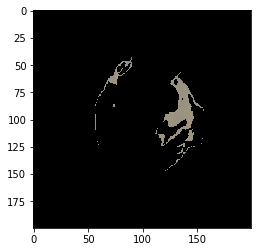

[[0.03025991 0.04449711 0.92524296]]
LOCATION: 52 PIECE: white pawn
437.5	87.5	525.0	175.0


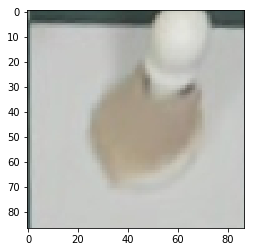

[170 140 120]
[190 160 130]


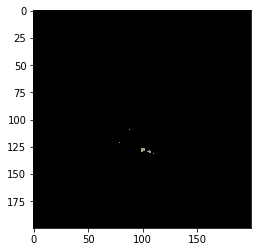

[140 140 125]
[160 150 135]


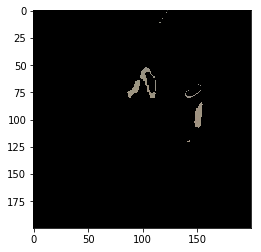

[[0.04255169 0.12223108 0.83521724]]
LOCATION: 53 PIECE: white pawn
525.0	87.5	612.5	175.0


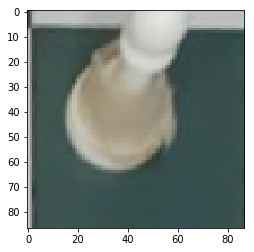

[120 100  60]
[150 130 100]


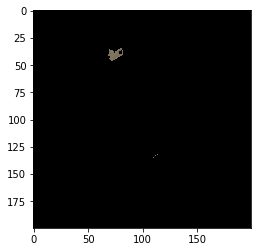

[140 140 125]
[160 150 135]


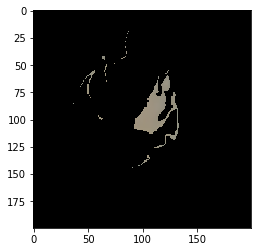

[[0.05422821 0.15691045 0.78886133]]
LOCATION: 54 PIECE: white pawn
612.5	87.5	700.0	175.0


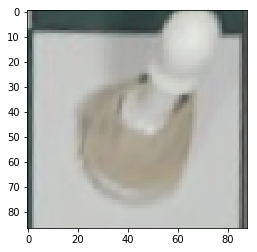

[140 140 125]
[160 150 135]


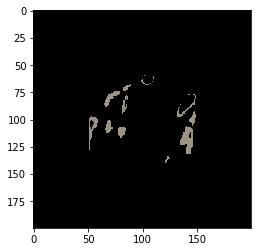

[[0.0340593  0.08519346 0.8807472 ]]
LOCATION: 55 PIECE: white pawn
0.0	175.0	87.5	262.5


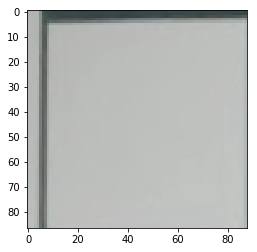

[[0.04190426 0.90574414 0.05235168]]
LOCATION: 40 PIECE: Blank
87.5	175.0	175.0	262.5


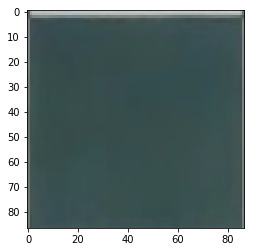

[[0.24826361 0.6891556  0.06258076]]
LOCATION: 41 PIECE: Blank
175.0	175.0	262.5	262.5


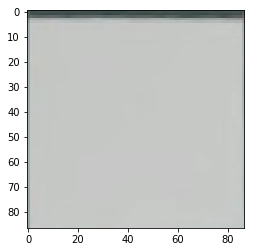

[[0.05038829 0.8786177  0.07099402]]
LOCATION: 42 PIECE: Blank
262.5	175.0	350.0	262.5


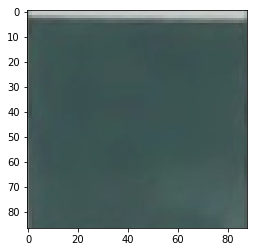

[[0.19988705 0.73885036 0.06126254]]
LOCATION: 43 PIECE: Blank
350.0	175.0	437.5	262.5


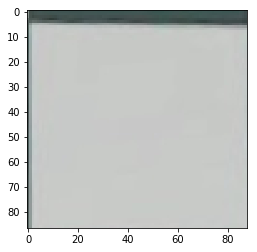

[[0.04299457 0.9053141  0.05169132]]
LOCATION: 44 PIECE: Blank
437.5	175.0	525.0	262.5


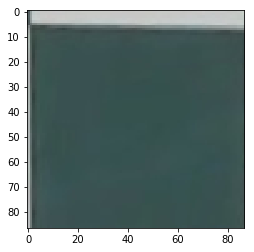

[[0.16836937 0.76082367 0.07080694]]
LOCATION: 45 PIECE: Blank
525.0	175.0	612.5	262.5


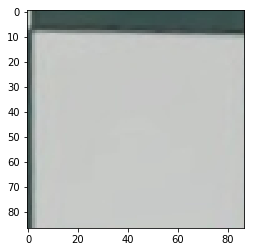

[[0.04309704 0.90914077 0.04776219]]
LOCATION: 46 PIECE: Blank
612.5	175.0	700.0	262.5


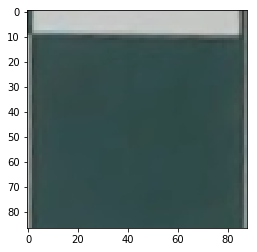

[[0.19786642 0.7358965  0.06623716]]
LOCATION: 47 PIECE: Blank
0.0	262.5	87.5	350.0


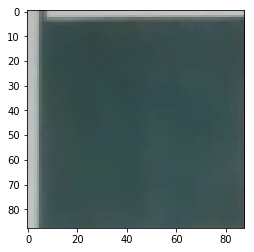

[[0.31483576 0.6116564  0.07350784]]
LOCATION: 32 PIECE: Blank
87.5	262.5	175.0	350.0


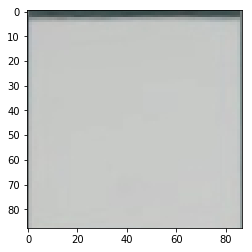

[[0.05597263 0.84484303 0.09918432]]
LOCATION: 33 PIECE: Blank
175.0	262.5	262.5	350.0


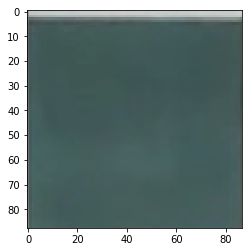

[[0.14599825 0.7989469  0.05505488]]
LOCATION: 34 PIECE: Blank
262.5	262.5	350.0	350.0


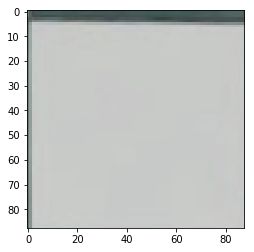

[[0.04326804 0.90636    0.05037192]]
LOCATION: 35 PIECE: Blank
350.0	262.5	437.5	350.0


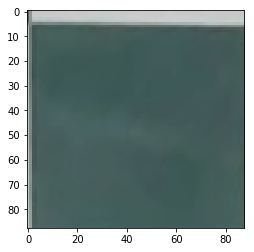

[[0.15054286 0.78927577 0.06018137]]
LOCATION: 36 PIECE: Blank
437.5	262.5	525.0	350.0


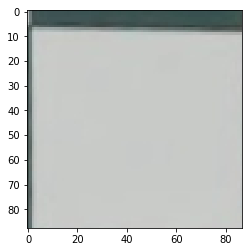

[[0.04568764 0.8941086  0.06020375]]
LOCATION: 37 PIECE: Blank
525.0	262.5	612.5	350.0


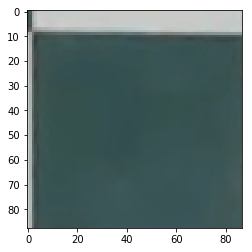

[[0.22040683 0.7125153  0.06707785]]
LOCATION: 38 PIECE: Blank
612.5	262.5	700.0	350.0


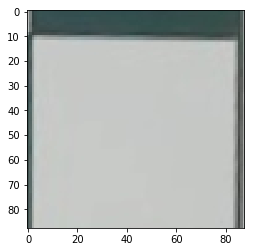

[[0.03865871 0.9300344  0.03130687]]
LOCATION: 39 PIECE: Blank
0.0	350.0	87.5	437.5


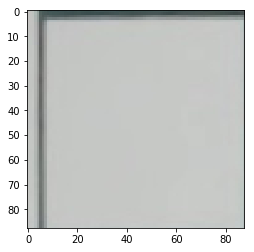

[[0.04463444 0.8988395  0.05652618]]
LOCATION: 24 PIECE: Blank
87.5	350.0	175.0	437.5


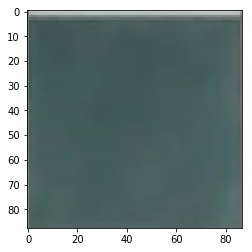

[[0.14065114 0.8026393  0.05670965]]
LOCATION: 25 PIECE: Blank
175.0	350.0	262.5	437.5


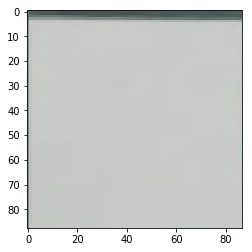

[[0.05216807 0.86568624 0.08214565]]
LOCATION: 26 PIECE: Blank
262.5	350.0	350.0	437.5


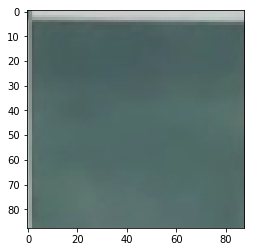

[[0.13298711 0.7950532  0.07195974]]
LOCATION: 27 PIECE: Blank
350.0	350.0	437.5	437.5


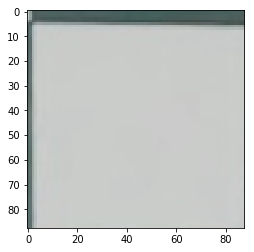

[[0.04602159 0.88697684 0.06700164]]
LOCATION: 28 PIECE: Blank
437.5	350.0	525.0	437.5


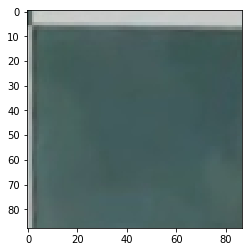

[[0.21355899 0.7218039  0.06463714]]
LOCATION: 29 PIECE: Blank
525.0	350.0	612.5	437.5


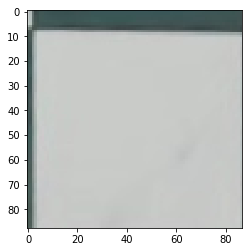

[[0.04659686 0.8888578  0.06454533]]
LOCATION: 30 PIECE: Blank
612.5	350.0	700.0	437.5


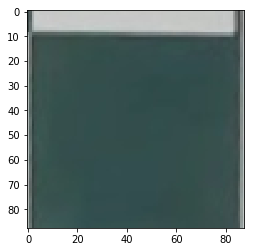

[[0.21242744 0.724642   0.06293055]]
LOCATION: 31 PIECE: Blank
0.0	437.5	87.5	525.0


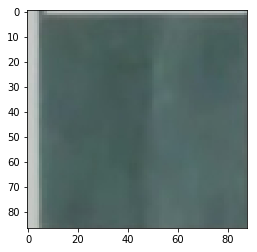

[[0.19129466 0.7539997  0.05470557]]
LOCATION: 16 PIECE: Blank
87.5	437.5	175.0	525.0


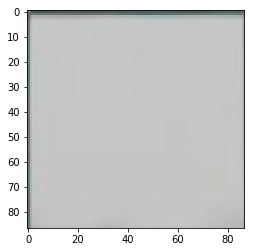

[[0.04810181 0.8916778  0.06022039]]
LOCATION: 17 PIECE: Blank
175.0	437.5	262.5	525.0


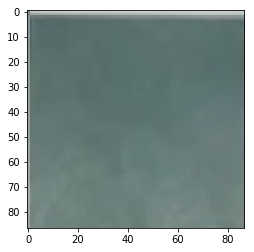

[[0.08594801 0.8686868  0.04536515]]
LOCATION: 18 PIECE: Blank
262.5	437.5	350.0	525.0


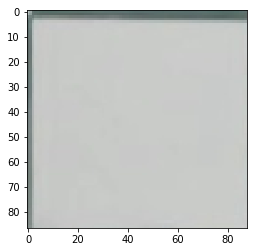

[[0.04924483 0.8785755  0.07217965]]
LOCATION: 19 PIECE: Blank
350.0	437.5	437.5	525.0


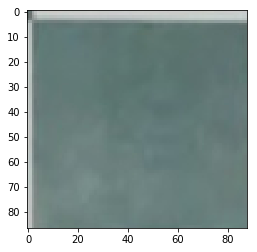

[[0.07678869 0.8749149  0.04829646]]
LOCATION: 20 PIECE: Blank
437.5	437.5	525.0	525.0


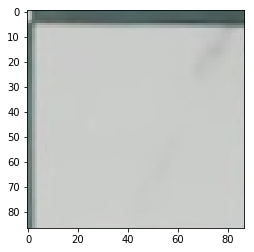

[[0.04973459 0.86659414 0.08367117]]
LOCATION: 21 PIECE: Blank
525.0	437.5	612.5	525.0


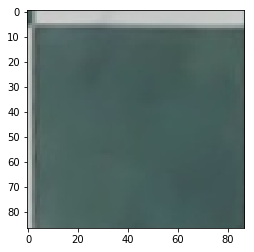

[[0.13777938 0.79716456 0.06505608]]
LOCATION: 22 PIECE: Blank
612.5	437.5	700.0	525.0


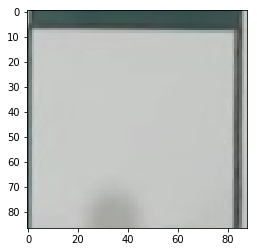

[[0.0473812  0.8782296  0.07438923]]
LOCATION: 23 PIECE: Blank
0.0	525.0	87.5	612.5


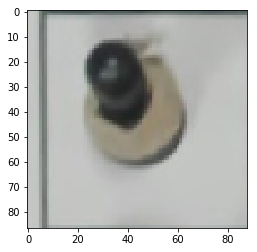

[120 100  60]
[150 130 100]


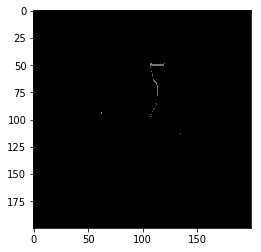

[140 140 125]
[160 150 135]


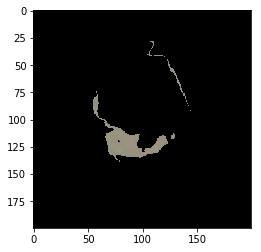

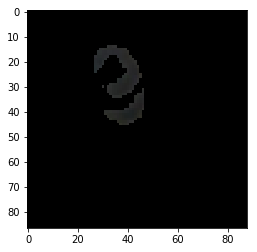

[[0.5916933  0.27684405 0.13146262]]
LOCATION: 8 PIECE: black pawn
87.5	525.0	175.0	612.5


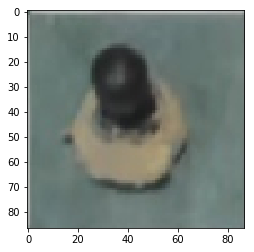

[120 100  60]
[150 130 100]


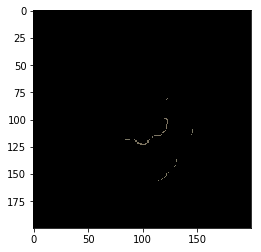

[170 140 120]
[190 160 130]


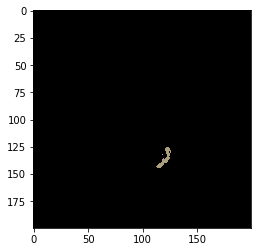

[140 140 125]
[160 150 135]


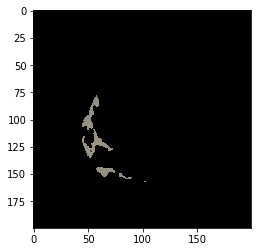

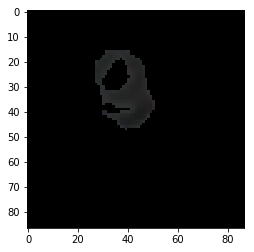

[[0.7203454  0.14738171 0.1322729 ]]
LOCATION: 9 PIECE: black pawn
175.0	525.0	262.5	612.5


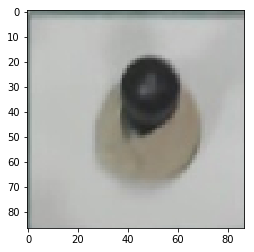

[140 140 125]
[160 150 135]


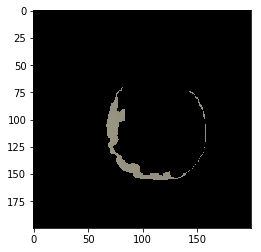

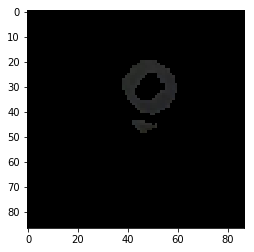

[[0.793159   0.07330291 0.13353817]]
LOCATION: 10 PIECE: black pawn
262.5	525.0	350.0	612.5


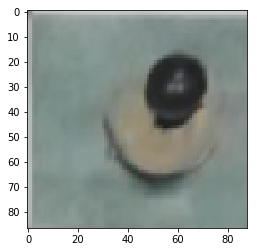

[140 140 125]
[160 150 135]


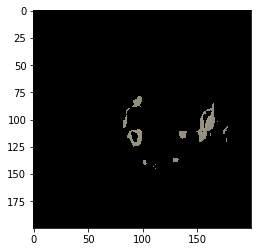

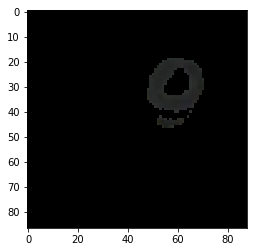

[[0.16996062 0.5212724  0.30876687]]
LOCATION: 11 PIECE: black pawn
350.0	525.0	437.5	612.5


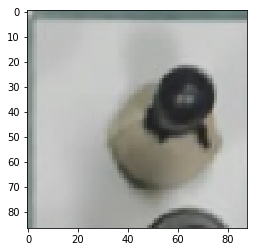

[120 100  60]
[150 130 100]


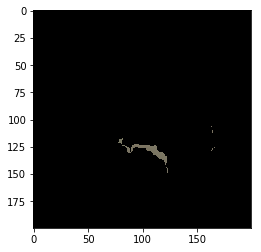

[140 140 125]
[160 150 135]


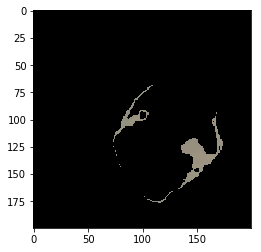

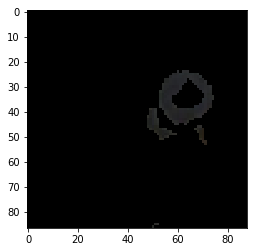

[[0.27117077 0.09022176 0.6386075 ]]
LOCATION: 12 PIECE: black pawn
437.5	525.0	525.0	612.5


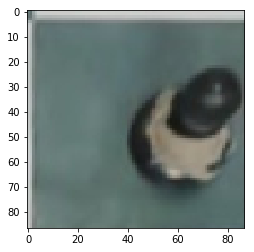

[120 100  60]
[150 130 100]


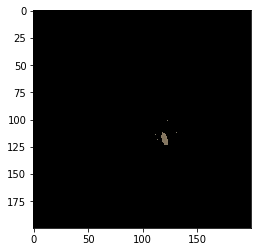

[140 140 125]
[160 150 135]


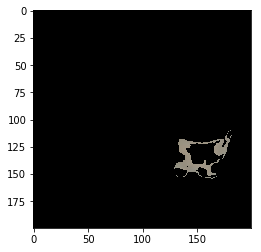

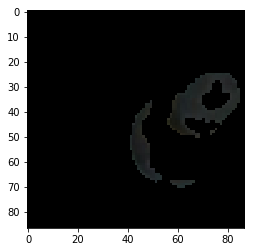

[[0.46733186 0.43860465 0.09406353]]
LOCATION: 13 PIECE: black pawn
525.0	525.0	612.5	612.5


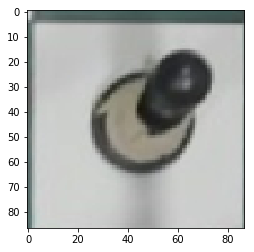

[140 140 125]
[160 150 135]


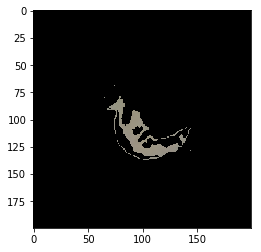

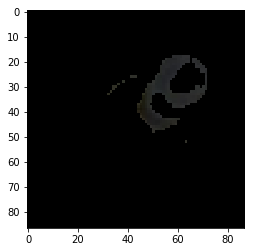

[[0.49024147 0.2440075  0.26575112]]
LOCATION: 14 PIECE: black pawn
612.5	525.0	700.0	612.5


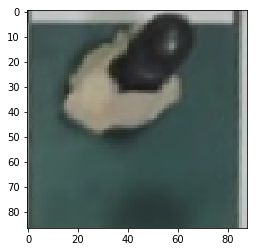

[140 140 125]
[160 150 135]


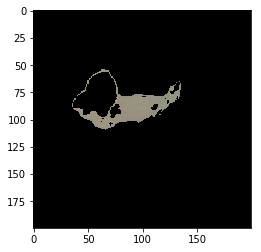

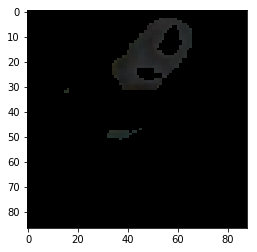

[[0.313055   0.38000262 0.3069424 ]]
LOCATION: 15 PIECE: black pawn
0.0	612.5	87.5	700.0


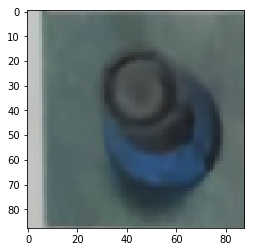

[30 60 90]
[ 50  80 110]


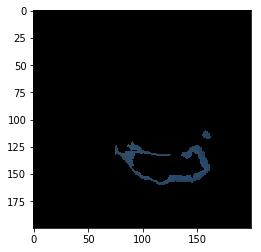

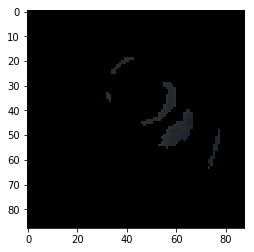

[[0.9033202  0.07152847 0.02515131]]
LOCATION: 0 PIECE: black rook
87.5	612.5	175.0	700.0


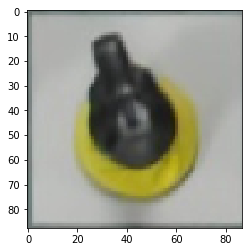

[140  90  20]
[150 140  60]


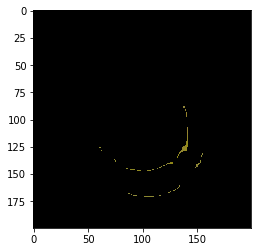

[120 120  20]
[150 150  50]


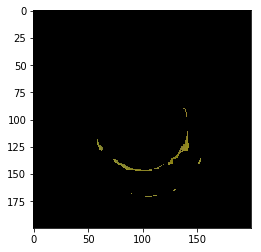

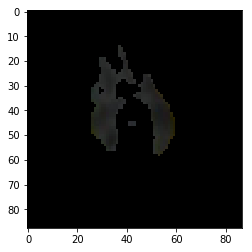

[[0.8783446  0.0495269  0.07212856]]
LOCATION: 1 PIECE: black knight
175.0	612.5	262.5	700.0


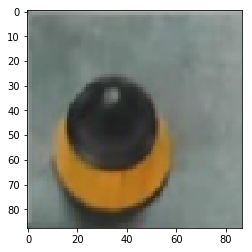

[110  70  30]
[125  80  40]


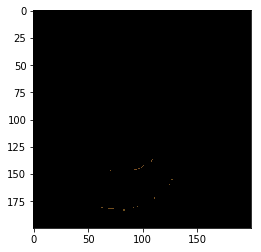

[180 110  20]
[200 140  60]


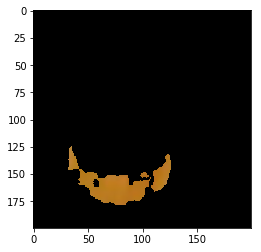

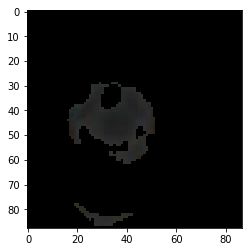

[[0.8843194  0.0830799  0.03260059]]
LOCATION: 2 PIECE: black bishop
262.5	612.5	350.0	700.0


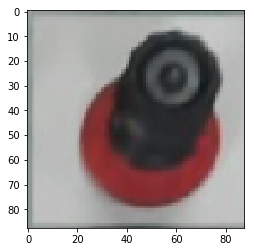

[120  35  45]
[140  50  55]


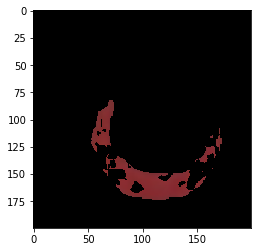

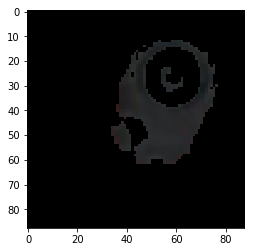

[[0.87293756 0.04411917 0.08294322]]
LOCATION: 3 PIECE: black queen
350.0	612.5	437.5	700.0


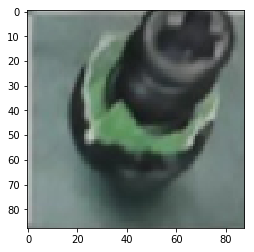

[110 150 120]
[120 160 130]


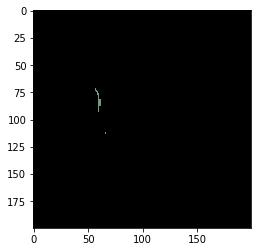

[ 90 130  90]
[100 140 100]


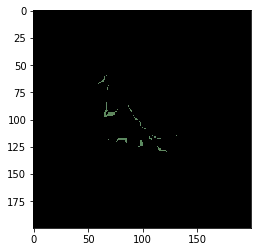

[ 90 135  90]
[110 150 110]


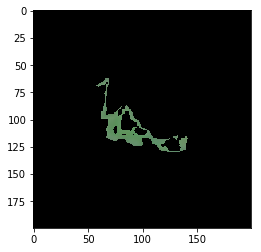

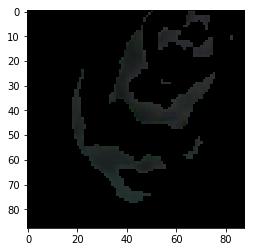

[[0.21166223 0.25009352 0.53824425]]
LOCATION: 4 PIECE: black king
437.5	612.5	525.0	700.0


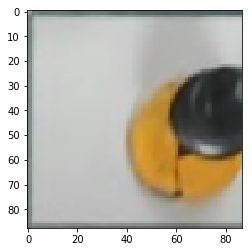

[180 110  20]
[200 140  60]


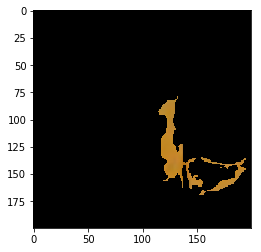

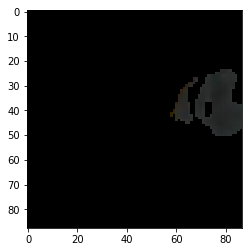

[[0.04210604 0.03575025 0.92214364]]
LOCATION: 5 PIECE: black bishop
525.0	612.5	612.5	700.0


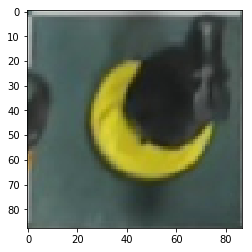

[140  90  20]
[150 140  60]


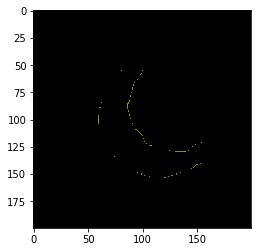

[120 120  20]
[150 150  50]


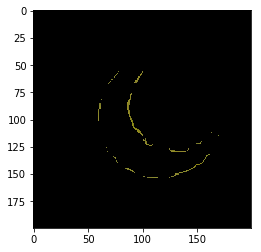

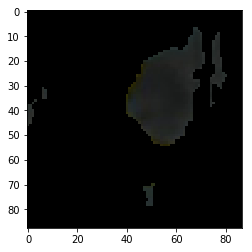

[[0.07196561 0.03790014 0.8901342 ]]
LOCATION: 6 PIECE: black knight
612.5	612.5	700.0	700.0


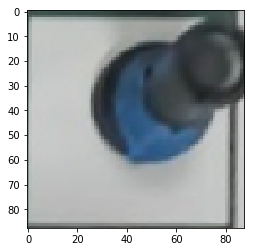

[ 50  90 140]
[ 90 130 180]


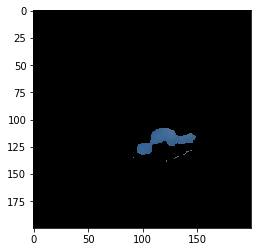

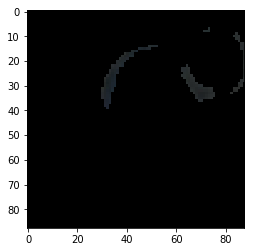

[[0.9184725  0.06923572 0.01229176]]
LOCATION: 7 PIECE: black rook


In [234]:
def identify_pieces_on_board(image):
    #answer, number = find_optimal_threshold(image)
    #Part below doesn't run?
    #%run python main.py --input image --output board.jpg detect
    #subprocess.check_output(["python", "main.py", "--input",image,"--output","board.jpg","detect"])
    breakdown_image('board1.jpg')

identify_pieces_on_board('test.jpg')

In [229]:
fig
plt.show()

NameError: name 'fig' is not defined

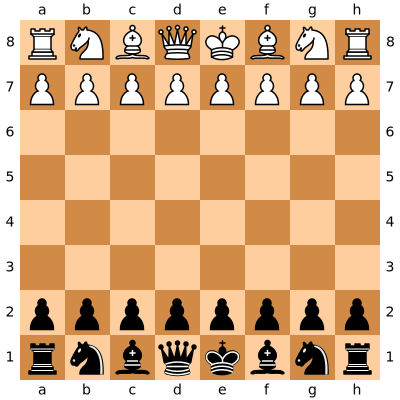

In [235]:
import chess
board = chess.Board()
board.set_piece_map(final_piece_mapping)
#board.set_piece_at(10, chess.Piece('queen',1), promoted=False)
board


In [238]:
engine = chess.uci.popen_engine("/Users/yashaektefaie/Dropbox/ee106a/robot_chess/actual_final_code/stockfish-10-mac/Mac/stockfish-10-64")
engine.uci()
engine.position(board)
best_move = engine.go(movetime=2000).bestmove
print(best_move)

AttributeError: module 'chess' has no attribute 'popen_engine'

In [189]:
chess.Piece('knight','white')
board.set_piece_map(final_piece_mapping)

AttributeError: 'str' object has no attribute 'piece_type'